# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [2]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [6]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [10]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {"pca__n_components":[4, 10, 20, 30, 40, 50, 64],
              "logistic__alpha":np.logspace(-4, 4, 5),}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)

print(search.best_score_)
print(search.best_params_)

0.9076431445372949
{'logistic__alpha': 0.0001, 'pca__n_components': 30}


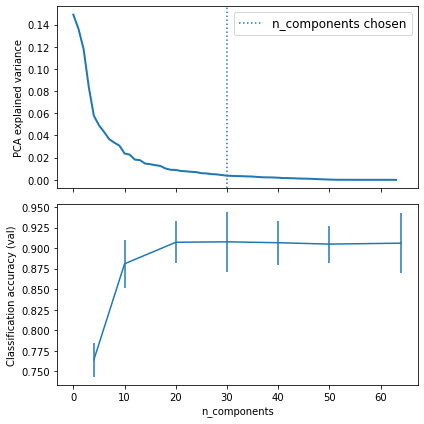

In [17]:
# 繪製不同 components 的 PCA 解釋度
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6,6))

# fit pca 模型
pca.fit(X_digits)
#畫圖 ax0
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

#加上最佳component數量
ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# 繪製不同採樣點的分類正確率
result = pd.DataFrame(search.cv_results_)
#畫圖ax1
best_clfs = result.groupby('param_pca__n_components').apply(lambda g:g.nlargest(1, 'mean_test_score')) 
best_clfs.plot(x='param_pca__n_components', y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.tight_layout()
plt.show()

In [ ]:
# 繪製不同採樣點的分類正確率


In [16]:
best_clfs

,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_pca__n_components,,,,,,,,,,,,,,,,
4,7,0.129322,0.011061,0.000599,0.000489,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.777778,0.738889,0.779944,0.785515,0.738162,0.764058,0.021001,13
10,8,0.133242,0.012514,0.001999,0.001552,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.902778,0.855556,0.891365,0.916435,0.838440,0.880915,0.029312,11
20,9,0.230923,0.020565,0.000798,0.000747,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.930556,0.880556,0.905292,0.941504,0.877437,0.907069,0.025774,3
30,3,0.188815,0.017233,0.000799,0.000399,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.922222,0.858333,0.924791,0.958217,0.874652,0.907643,0.036288,1
40,4,0.201769,0.019353,0.000798,0.000399,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.911111,0.866667,0.916435,0.947075,0.891365,0.906530,0.026766,4
50,12,0.819341,0.047506,0.001405,0.001865,0.01,50,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.891667,0.897222,0.924791,0.935933,0.874652,0.904853,0.022395,6
64,6,0.265542,0.030619,0.000000,0.000000,0.0001,64,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.905556,0.855556,0.930362,0.958217,0.880223,0.905983,0.036137,5
